<div style="
    color: white; 
    background-color: gray; 
    padding: 10px; 
    text-align: center; 
    font-family: Arial, sans-serif; 
    border-radius: 15px;
    margin-top: 20px;
">
    <h1>Real Estate Price Prediction</h1>
</div>

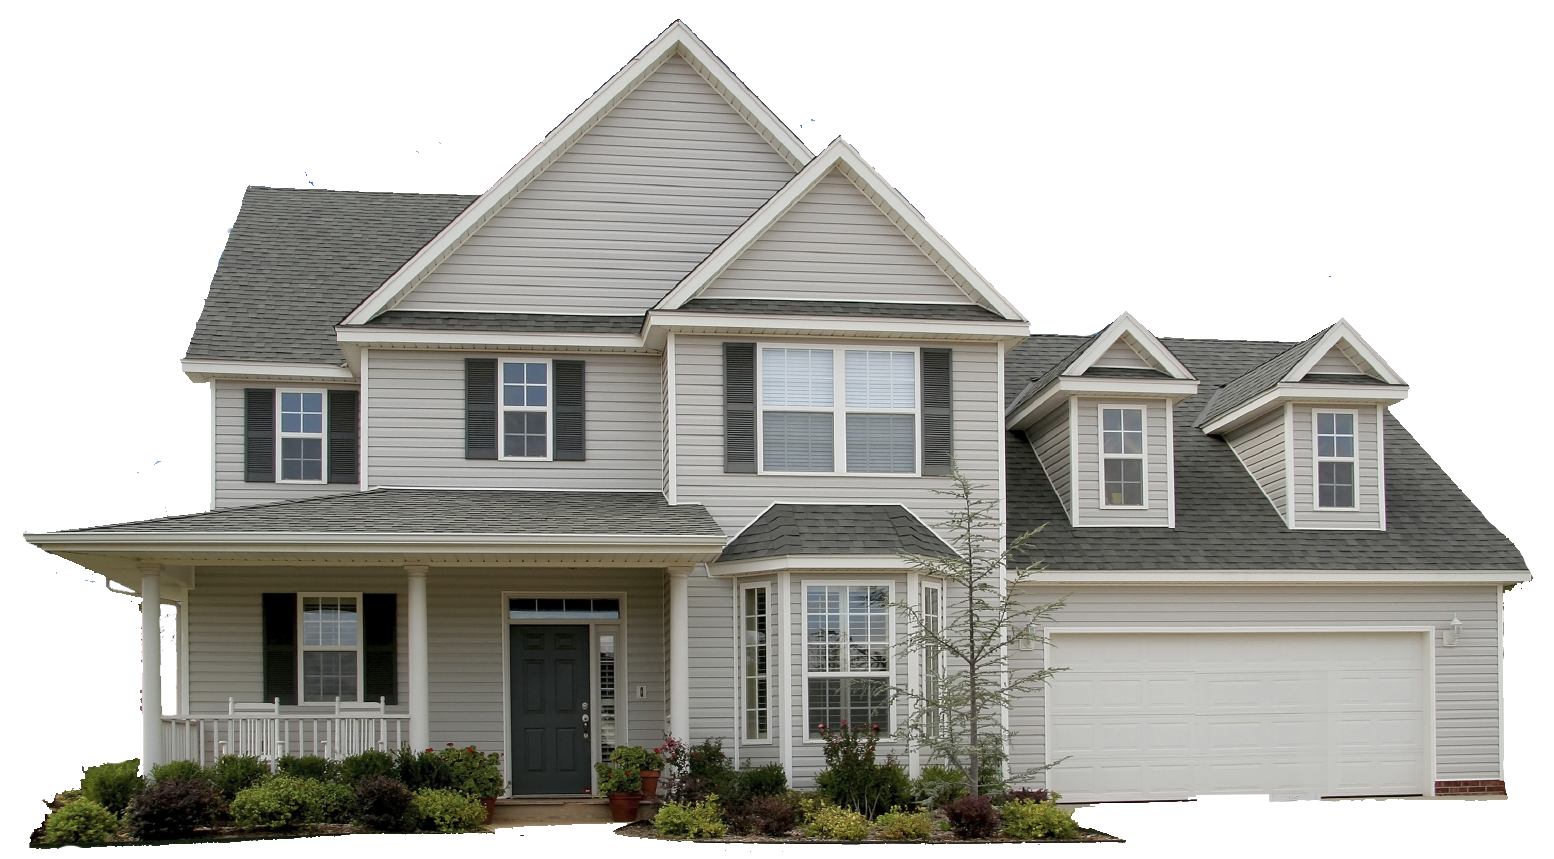

<a href="https://www.kaggle.com/datasets/amaanafif/chennai-house-price">Chennai DataSet</a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<div style="
    color: white; 
    background-color: gray; 
    padding: 10px; 
    text-align: center; 
    font-family: Arial, sans-serif; 
    border-radius: 15px;
    margin-top: 10px;
">
   <h2>Load Dataset</h2>
</div>

In [2]:
data = pd.read_csv(r'C:\Users\nihar\OneDrive\Desktop\Final_year_project\data\india\Chennai.csv')

In [3]:
data.head()

,price,area,status,bhk,bathroom,age,location,builder
0,37.49,872,Ready to move,2,NaN,1.0,Sembakkam,MP Developers
1,93.54,1346,Under Construction,3,2.0,NaN,Selaiyur,DAC Promoters
2,151.00,2225,Under Construction,3,NaN,0.0,Mogappair,Casagrand Builder Private Limited
3,49.00,1028,Ready to move,2,2.0,3.0,Ambattur,Dugar Housing Builders
4,42.28,588,Under Construction,2,1.0,0.0,Pallavaram,Radiance Realty Developers India Ltd


In [4]:
data.shape

(2620, 8)

<div style="
    color: white; 
    background-color: gray; 
    padding: 10px; 
    text-align: center; 
    font-family: Arial, sans-serif; 
    border-radius: 15px;
    margin-top: 10px;
">
   <h2> Data Exploration </h2>
</div>

In [5]:
data.isnull().sum()

price          0
area           0
status         0
bhk            0
bathroom    1217
age          891
location       0
builder        0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2620 entries, 0 to 2619
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     2620 non-null   float64
 1   area      2620 non-null   int64  
 2   status    2620 non-null   object 
 3   bhk       2620 non-null   int64  
 4   bathroom  1403 non-null   float64
 5   age       1729 non-null   float64
 6   location  2620 non-null   object 
 7   builder   2620 non-null   object 
dtypes: float64(3), int64(2), object(3)
memory usage: 163.9+ KB


In [7]:
data.describe()

,price,area,bhk,bathroom,age
count,2620.000000,2620.000000,2620.000000,1403.000000,1729.000000
mean,93.834683,1282.925191,2.443893,2.359230,1.355119
std,113.609349,692.566319,0.811984,0.844951,2.102682
min,12.830000,300.000000,1.000000,1.000000,0.000000
25%,42.000000,877.000000,2.000000,2.000000,0.000000
50%,61.735000,1091.500000,2.000000,2.000000,0.000000
75%,90.000000,1471.250000,3.000000,3.000000,3.000000
max,1422.000000,6700.000000,8.000000,7.000000,32.000000


<div style="
    color: white; 
    background-color: gray; 
    padding: 10px; 
    text-align: center; 
    font-family: Arial, sans-serif; 
    border-radius: 15px;
    margin-top: 10px;
">
   <h2> Data Cleaning and Preprocessing </h2>
</div>

In [8]:
data.bathroom.fillna(data.bathroom.median(), inplace=True)

In [9]:
data.age.fillna(data.age.median(), inplace=True)

In [10]:
data.drop('builder', axis=1, inplace=True)

In [11]:
data.isnull().sum()

price       0
area        0
status      0
bhk         0
bathroom    0
age         0
location    0
dtype: int64

In [12]:
data.bhk.unique()

array([2, 3, 4, 1, 5, 6, 8], dtype=int64)

In [13]:
data.shape

(2620, 7)

<div style="
    color: white; 
    background-color: gray; 
    padding: 10px; 
    text-align: center; 
    font-family: Arial, sans-serif; 
    border-radius: 15px;
    margin-top: 10px;
">
   <h2> Data Visualization  </h2>
</div>

C:\Users\nihar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


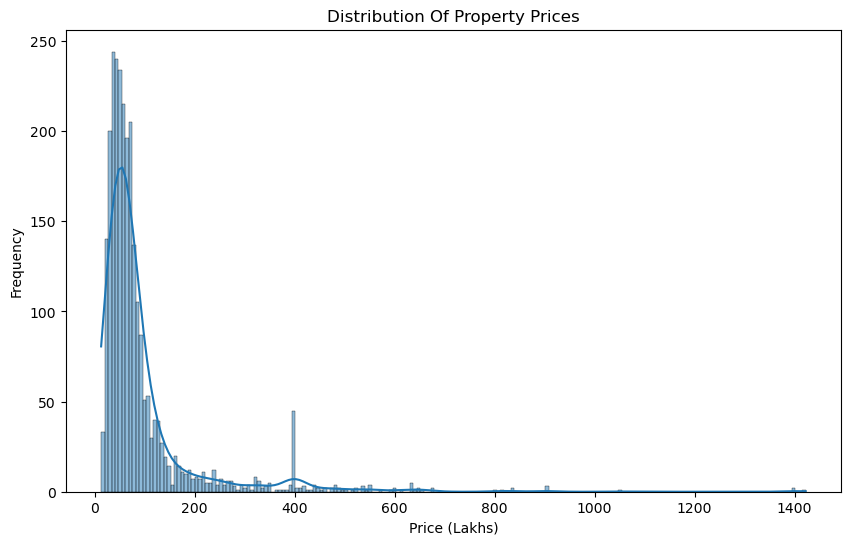

In [14]:
plt.figure(figsize=(10,6))
sns.histplot(data['price'], kde=True)
plt.title('Distribution Of Property Prices')
plt.xlabel('Price (Lakhs)')
plt.ylabel('Frequency')
plt.show()

In [15]:
data.location.nunique()

178

In [16]:
data.location = data.location.apply(lambda x: x.strip())

loc_stat = data.groupby('location')['location'].agg('count').sort_values(ascending=False)
len(loc_stat[loc_stat<=10])

119

In [17]:
data.location = data.location.apply(lambda x: 'others' if x in loc_stat[loc_stat<=10] else x)

In [18]:
data.location.nunique()

60

<div style="
    color: white; 
    background-color: gray; 
    padding: 10px; 
    text-align: center; 
    font-family: Arial, sans-serif; 
    border-radius: 15px;
    margin-top: 10px;
">
   <h2> Outliers </h2>
</div>

In [20]:
num_fea = ['bathroom','age', 'price', 'bhk']

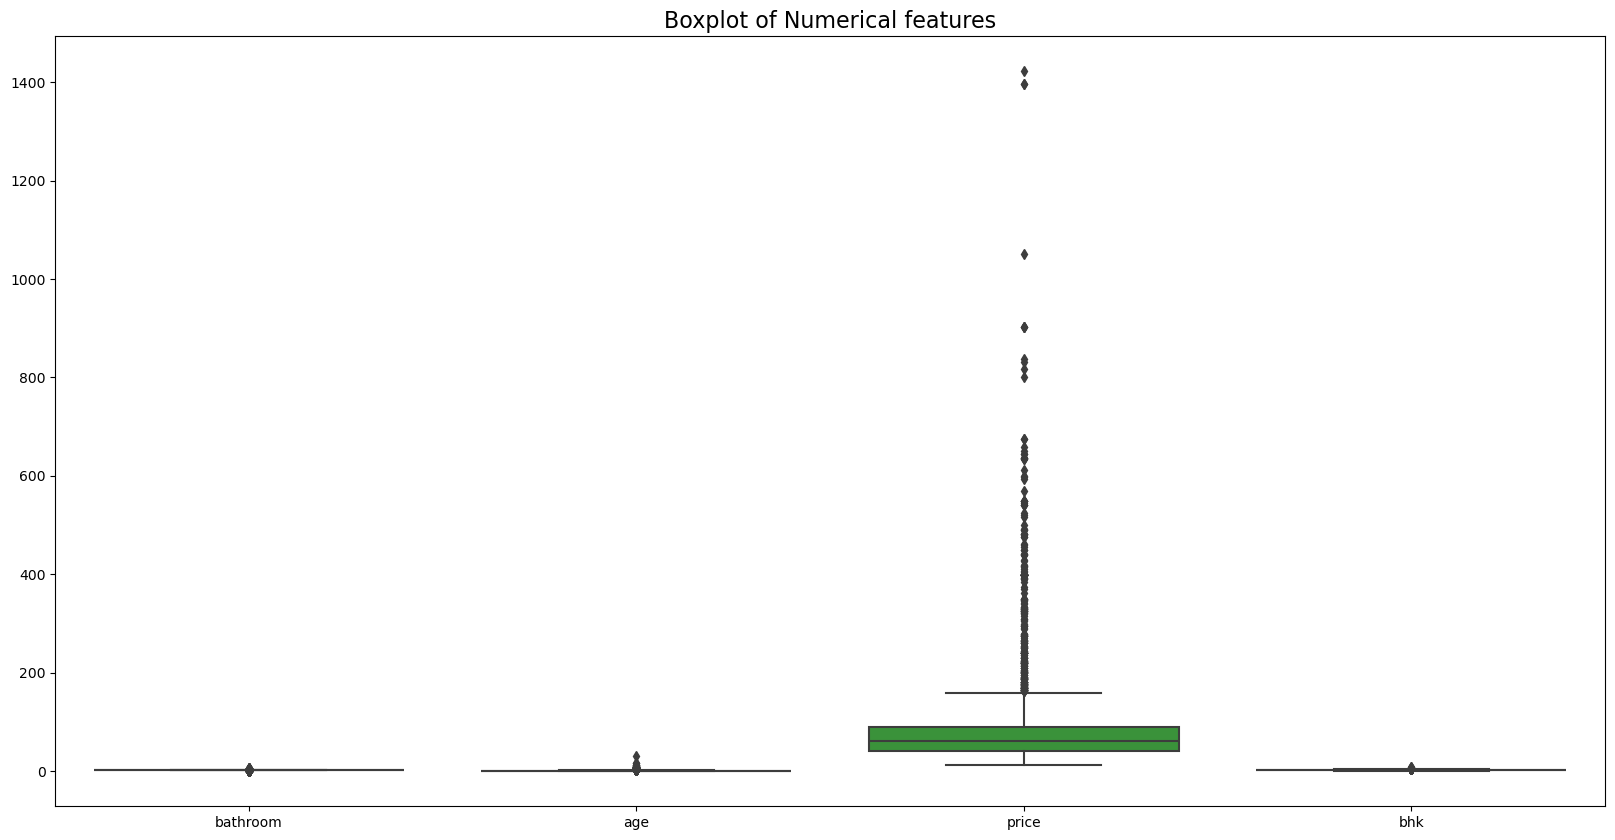

In [21]:
plt.figure(figsize=(20,10))
sns.boxplot(data = data[num_fea])
plt.title("Boxplot of Numerical features", fontsize=16)
plt.show()

<div style="
    color: white; 
    background-color: gray; 
    padding: 10px; 
    text-align: center; 
    font-family: Arial, sans-serif; 
    border-radius: 15px;
    margin-top: 10px;
">
   <h2> Remove Outliers </h2>
</div>

In [22]:
data = data[data['price'] <= data['price'].quantile(0.99)]
data.shape

(2593, 7)

In [23]:
data.bhk.value_counts()

bhk
2    1367
3     886
1     177
4      95
5      63
6       3
8       2
Name: count, dtype: int64

Text(0, 0.5, 'Count')

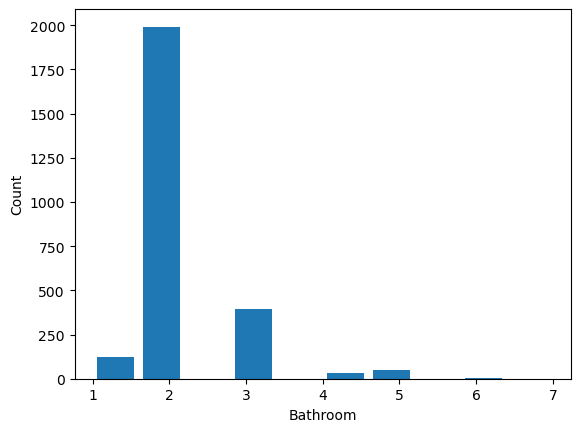

In [24]:
plt.hist(data.bathroom, rwidth = 0.8)
plt.xlabel('Bathroom')
plt.ylabel('Count')

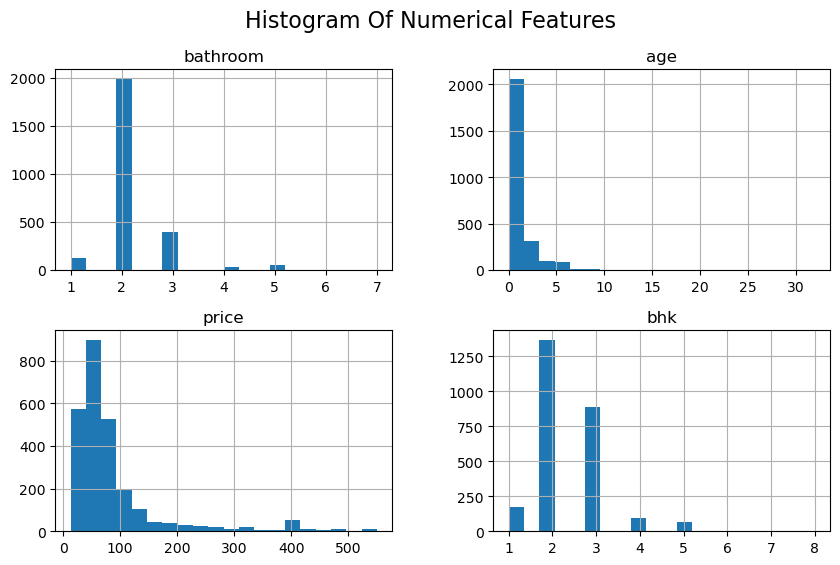

In [25]:
data[num_fea].hist(bins=20, figsize=(10,6))
plt.suptitle('Histogram Of Numerical Features', fontsize=16)
plt.show()

### Boxplot

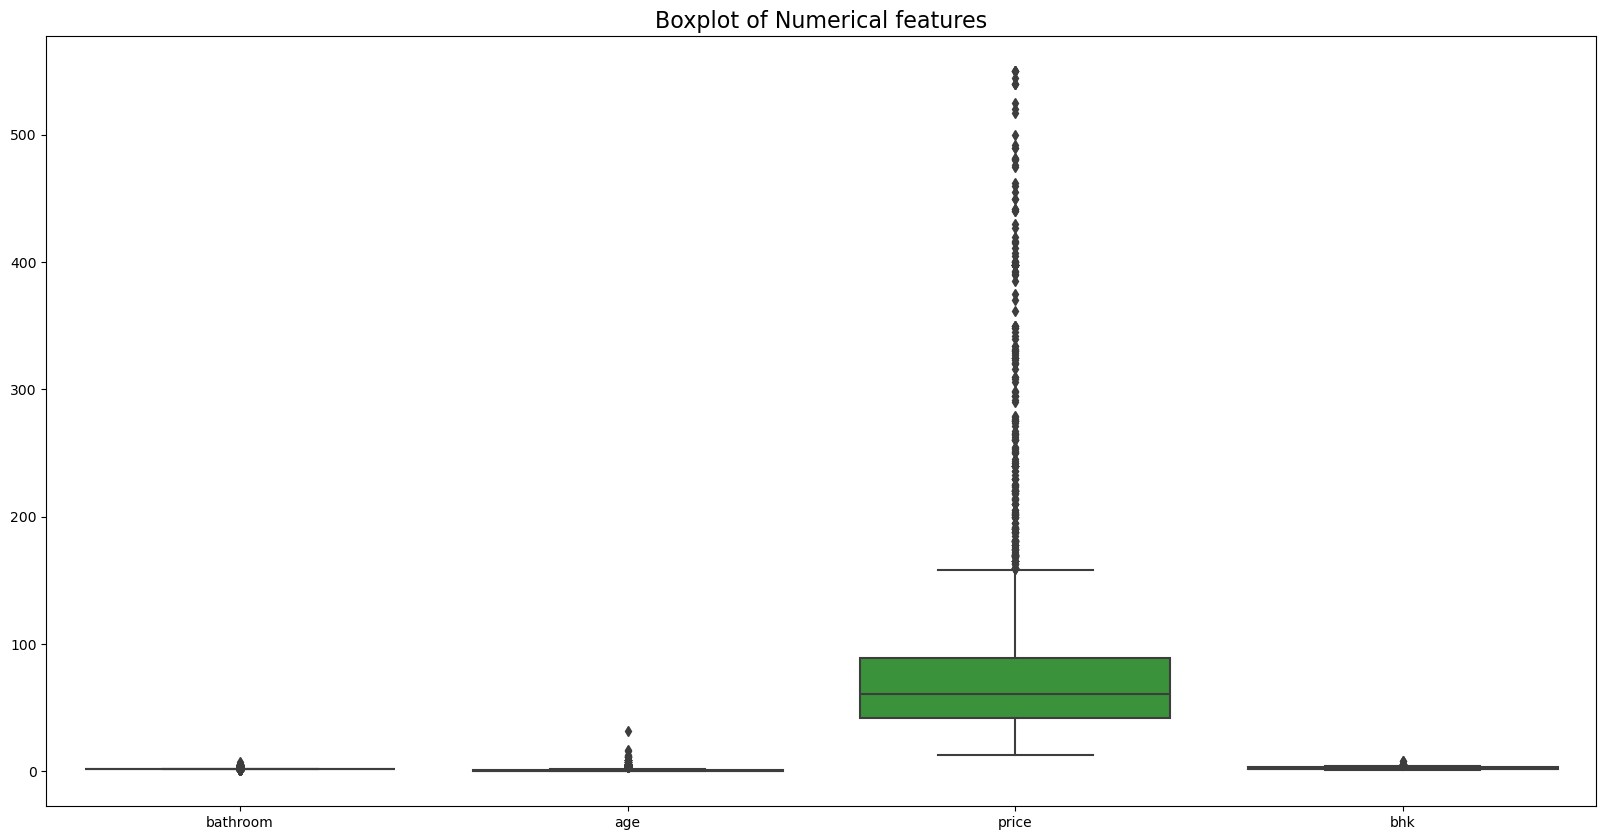

In [26]:
plt.figure(figsize=(20,10))
sns.boxplot(data = data[num_fea])
plt.title("Boxplot of Numerical features", fontsize=16)
plt.show()

### Pair Plot

C:\Users\nihar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nihar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nihar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nihar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

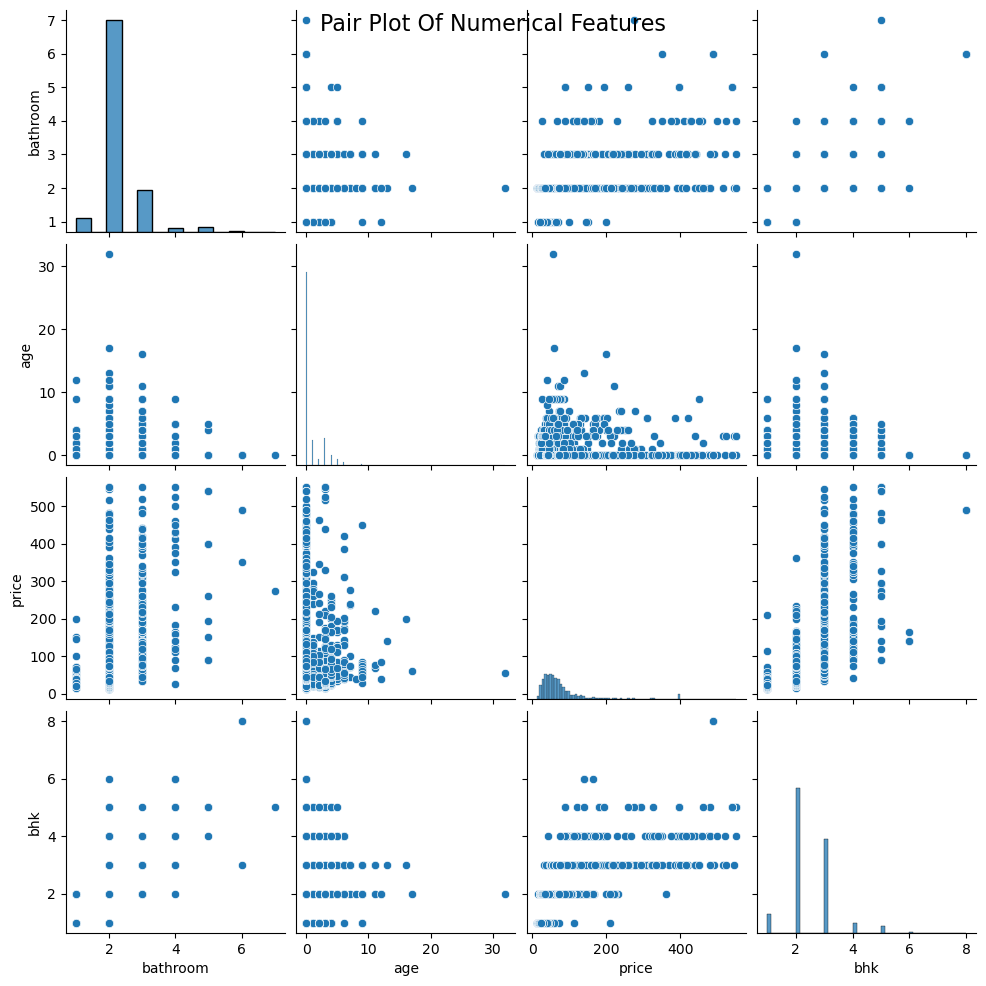

In [27]:
sns.pairplot(data = data[num_fea])
plt.suptitle("Pair Plot Of Numerical Features", fontsize=16)
plt.show()

### Correlation heatmap

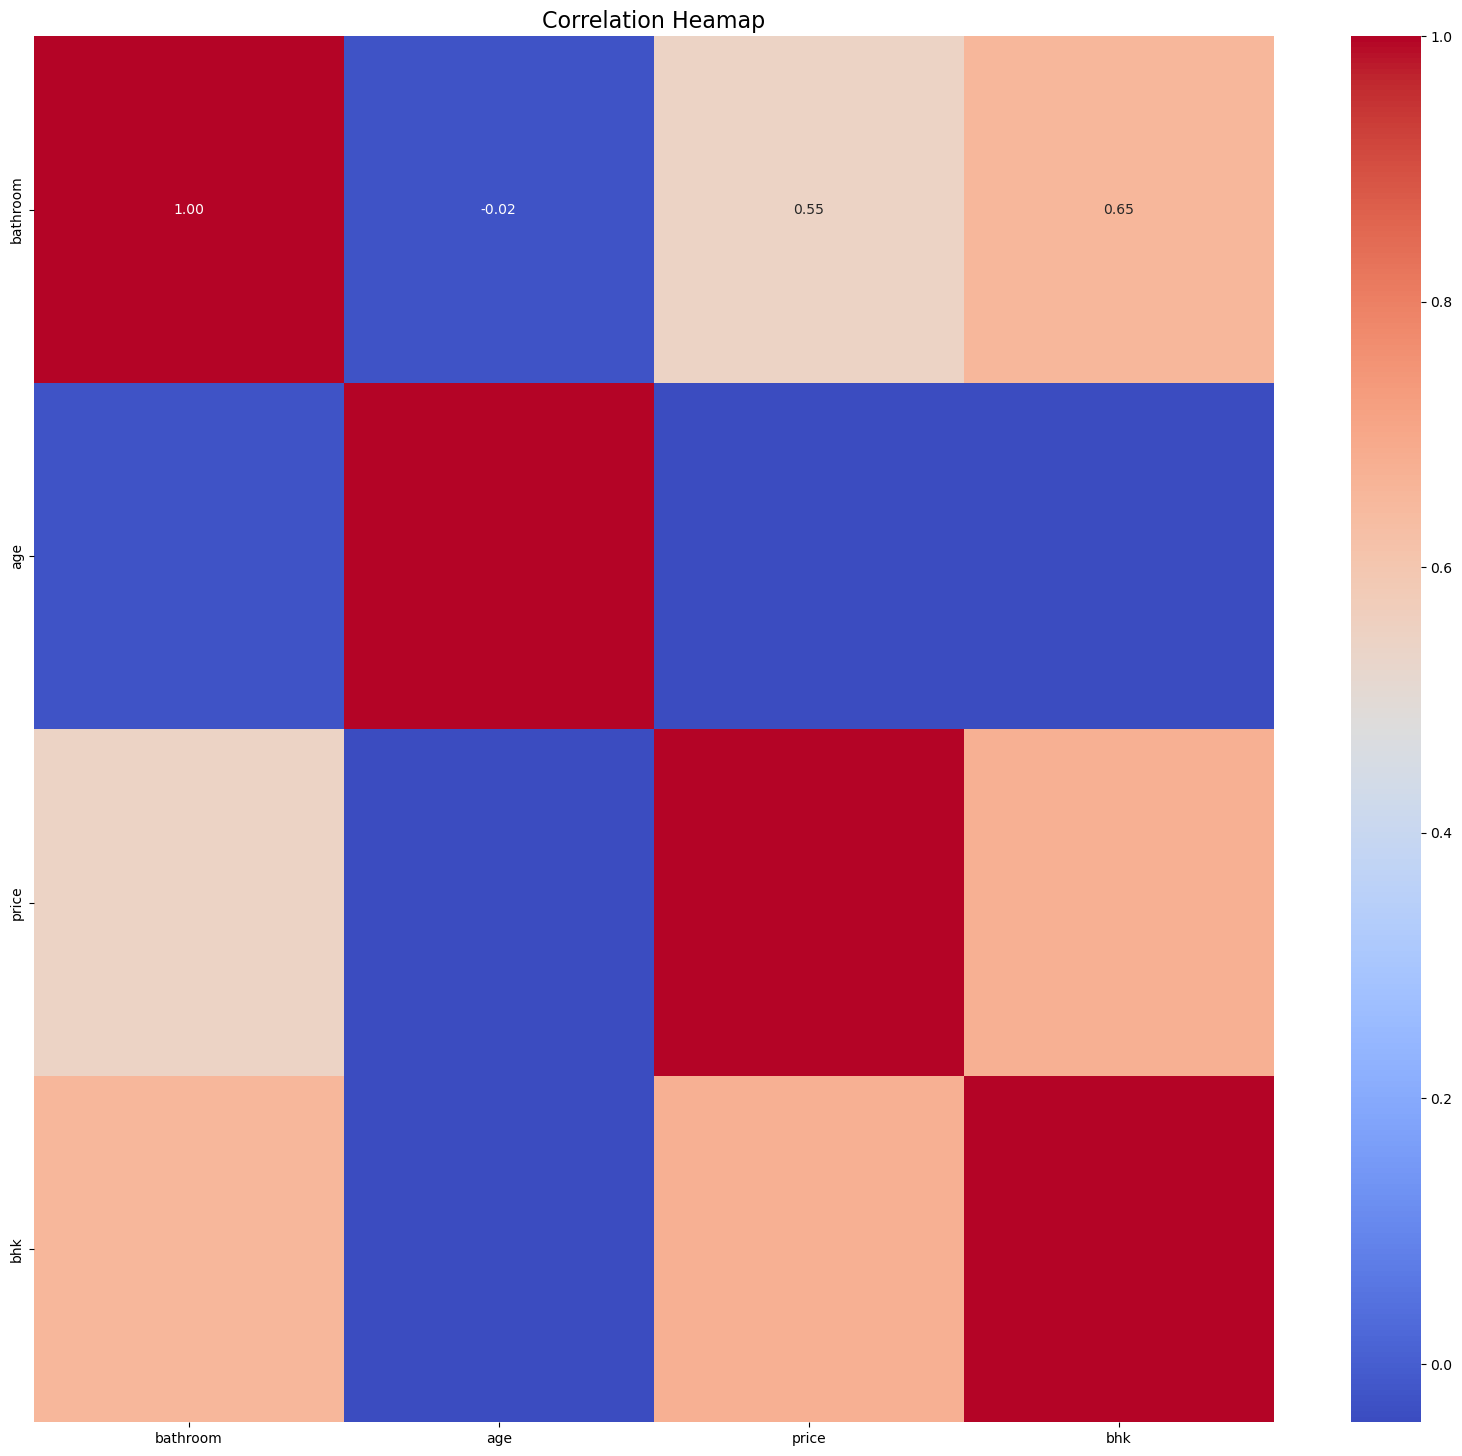

In [28]:
plt.figure(figsize=(20, 18))
sns.heatmap(data[num_fea].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heamap",fontsize=16)
plt.show()

<div style="
    color: white; 
    background-color: gray; 
    padding: 10px; 
    text-align: center; 
    font-family: Arial, sans-serif; 
    border-radius: 15px;
    margin-top: 10px;
">
   <h2> Encoding the categorical data  </h2>
</div>

In [29]:
data = pd.get_dummies(data, columns = ['location'])
data.head()

,price,area,status,bhk,bathroom,age,location_Adyar,location_Alwarpet,location_Ambattur,location_Anna Nagar,...,location_Tiruvottiyur,location_Vadanemmeli,location_Vadapalani,location_Vanagaram,location_Velachery,location_Vengaivasal,location_Veppampattu,location_West Mambalam,location_others,location_tambaram west
0,37.49,872,Ready to move,2,2.0,1.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,93.54,1346,Under Construction,3,2.0,0.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,151.00,2225,Under Construction,3,2.0,0.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,49.00,1028,Ready to move,2,2.0,3.0,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,42.28,588,Under Construction,2,1.0,0.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [31]:
data.drop(['location_others', 'status'],axis=1,inplace = True)

<div style="
    color: white; 
    background-color: gray; 
    padding: 10px; 
    text-align: center; 
    font-family: Arial, sans-serif; 
    border-radius: 15px;
    margin-top: 10px;
">
   <h2> Model Building  </h2>
</div>

<div style="
    color: white; 
    background-color: gray; 
    padding: 10px; 
    text-align: center; 
    font-family: Arial, sans-serif; 
    border-radius: 15px;
    margin-top: 10px;
">
   <h2> 1.Linear Regression  </h2>
</div>

In [32]:
data.rename(columns={'area':'total_sqft', 'bathroom':'bath'},inplace = True)

In [33]:
data.head(2)

,price,total_sqft,bhk,bath,age,location_Adyar,location_Alwarpet,location_Ambattur,location_Anna Nagar,location_Ayanambakkam,...,location_Thirumullaivoyal,location_Tiruvottiyur,location_Vadanemmeli,location_Vadapalani,location_Vanagaram,location_Velachery,location_Vengaivasal,location_Veppampattu,location_West Mambalam,location_tambaram west
0,37.49,872,2,2.0,1.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,93.54,1346,3,2.0,0.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [34]:
from sklearn.model_selection import train_test_split,ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [35]:
X = data.drop('price',axis=1)
y = data['price']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=43)

In [37]:
def evaluate_model(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    return mae, mse, rmse, r2

In [38]:
## Training the model
Linear_reg = LinearRegression()
Linear_reg.fit(X_train, y_train)

LinearRegression()

In [39]:
## Predict 
y_pred = Linear_reg.predict(X_test)

<div style="
    color: white; 
    background-color: gray; 
    padding: 5px; 
    text-align: center; 
    font-family: Arial, sans-serif; 
    border-radius: 15px;
    margin-top: 5px;
">
   <h3> Evaluation Of Model   </h3>
</div>

In [40]:
mae, mse, rmse, score = evaluate_model(y_test, y_pred)

In [41]:
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Score of the Model: {score*100:.2f} %")

Mean Absolute Error (MAE): 17.38
Mean Squared Error (MSE): 965.33
Root Mean Squared Error (RMSE): 31.07
Score of the Model: 87.42 %


In [42]:
cv  = ShuffleSplit(n_splits=5, test_size=0.2, random_state=43)
cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.87420134, 0.83525273, 0.84608753, 0.85517204, 0.8920802 ])

<div style="
    color: white; 
    background-color: gray; 
    padding: 10px; 
    text-align: center; 
    font-family: Arial, sans-serif; 
    border-radius: 15px;
    margin-top: 10px;
">
   <h2> 2.Decision Tree Regression  </h2>
</div>

In [43]:
from sklearn.tree import DecisionTreeRegressor

In [44]:
from sklearn.model_selection import GridSearchCV

In [45]:
decision_tree = DecisionTreeRegressor(random_state=42)

In [46]:
param_grid = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'auto', 'sqrt', 'log2']
}

In [47]:
grid_search_tree = GridSearchCV(estimator=decision_tree, param_grid=param_grid, cv=cv, n_jobs=-1, verbose=2)
grid_search_tree.fit(X_train, y_train)
best_tree = grid_search_tree.best_estimator_

Fitting 5 folds for each of 1728 candidates, totalling 8640 fits


In [48]:
y_pred = best_tree.predict(X_test)

<div style="
    color: white; 
    background-color: gray; 
    padding: 5px; 
    text-align: center; 
    font-family: Arial, sans-serif; 
    border-radius: 15px;
    margin-top: 5px;
">
   <h3> Evaluation Of The Model  </h3>
</div>

In [49]:
mae_tree, mse_tree, rmse_tree, r2_tree = evaluate_model(y_test, y_pred)

In [50]:
print("Best parameters:", grid_search_tree.best_params_)

Best parameters: {'criterion': 'squared_error', 'max_depth': 50, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'random'}


In [51]:
print(f"Decision Tree Regressor Mean Absolute Error (MAE): {mae_tree}")
print(f"Decision Tree Regressor Mean Squared Error (MSE): {mse_tree}")
print(f"Decision Tree Regressor Root Mean Squared Error (RMSE): {rmse_tree}")
print(f"Decision Tree Regressor R² score: {r2_tree*100:.2f}%")

Decision Tree Regressor Mean Absolute Error (MAE): 16.691776783510704
Decision Tree Regressor Mean Squared Error (MSE): 1810.5285300523185
Decision Tree Regressor Root Mean Squared Error (RMSE): 42.55030587495604
Decision Tree Regressor R² score: 76.41%


<div style="
    color: white; 
    background-color: gray; 
    padding: 10px; 
    text-align: center; 
    font-family: Arial, sans-serif; 
    border-radius: 15px;
    margin-top: 10px;
">
   <h2> 3.Random Forest Regression   </h2>
</div>

In [52]:
from sklearn.ensemble import RandomForestRegressor

In [53]:
rf_model = RandomForestRegressor()

In [54]:
params = {
    'n_estimators':[100, 200, 300, 400],
    'max_depth':[10, 20, 30, None],
    'min_samples_split':[2, 5, 7, 10],
    'min_samples_leaf':[1, 2, 3, 4],
}

In [55]:
### Grid Search with cross Validation 
gd_model = GridSearchCV(estimator=rf_model, param_grid=params, cv=cv, n_jobs=-1, verbose=2)
gd_model.fit(X_train, y_train)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits


GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=43, test_size=0.2, train_size=None),
             estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, None],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 5, 7, 10],
                         'n_estimators': [100, 200, 300, 400]},
             verbose=2)

In [56]:
bst_params = gd_model.best_params_
print("Best parameters:", bst_params)

Best parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}


In [57]:
# Training of the model
best_model = gd_model.best_estimator_
best_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=30, min_samples_split=10)

In [58]:
# Predict
y_pred = best_model.predict(X_test)

<div style="
    color: white; 
    background-color: gray; 
    padding: 5px; 
    text-align: center; 
    font-family: Arial, sans-serif; 
    border-radius: 15px;
    margin-top: 5px;
">
   <h3> Evaluation of the model  </h3>
</div>

In [59]:
mae_rf, mse_rf, rmse_rf, r2_rf = evaluate_model(y_test, y_pred)

In [60]:
print(f"Random Forest Mean Absolute Error (MAE): {mae_rf}")
print(f"Random Forest Mean Squared Error (MSE): {mse_rf}")
print(f"Random Forest Root Mean Squared Error (RMSE): {rmse_rf}")
print(f"R2 Score of Random Forest: {r2_rf*100:.2f}%")

Random Forest Mean Absolute Error (MAE): 13.897976003667823
Random Forest Mean Squared Error (MSE): 1129.7763516295984
Random Forest Root Mean Squared Error (RMSE): 33.61214589444712
R2 Score of Random Forest: 85.28%


<div style="
    color: white; 
    background-color: gray; 
    padding: 10px; 
    text-align: center; 
    font-family: Arial, sans-serif; 
    border-radius: 15px;
    margin-top: 10px;
">
   <h2> 4.XG Boost Regression </h2>
</div>

In [61]:
from xgboost import XGBRegressor

In [62]:
xgb_model = XGBRegressor(objective='reg:squarederror')

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0]
}


In [63]:
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7, 10],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.7, 0.8, 0.9, 1.0]},
             verbose=2)

In [64]:
best_param = grid_search.best_params_
print("Best parameters:", best_param)

Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 300, 'subsample': 1.0}


In [65]:
## Train the model
xgb_model = grid_search.best_estimator_
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [66]:
## Predict 
y_pred = xgb_model.predict(X_test)

<div style="
    color: white; 
    background-color: gray; 
    padding: 5px; 
    text-align: center; 
    font-family: Arial, sans-serif; 
    border-radius: 15px;
    margin-top: 5px;
">
   <h3> Evaluation of the model  </h3>
</div>

In [67]:
mae_xgb, mse_xgb, rmse_xgb, r2_xgb = evaluate_model(y_test, y_pred)

In [68]:
print(f"XGBoost Mean Absolute Error (MAE): {mae_xgb}")
print(f"XGBoost Mean Squared Error (MSE): {mse_xgb}")
print(f"XGBoost Root Mean Squared Error (RMSE): {rmse_xgb}")
print(f"R2 Score of XGBoost: {r2_xgb*100:.2f}%")

XGBoost Mean Absolute Error (MAE): 12.608270771563166
XGBoost Mean Squared Error (MSE): 773.541055772697
XGBoost Root Mean Squared Error (RMSE): 27.81260605863278
R2 Score of XGBoost: 89.92%


<div style="
    color: white; 
    background-color: gray; 
    padding: 10px; 
    text-align: center; 
    font-family: Arial, sans-serif; 
    border-radius: 15px;
    margin-top: 10px;
">
   <h2> Display Result   </h2>
</div>

In [69]:
def display_result(metrics):
    print("\nModel Performance Metrics:\n")
    for model, metric in metrics.items():
        print(f"{model} Performace: ")
        for m, v in metric.items():
            print(f"{m}: {v*100:.2f}%")
        print("\n"+"-"*30+"\n")

    # Visualize the results
    df = pd.DataFrame(metrics).T

    # Plotting the metrics
    plt.figure(figsize=(14, 8))

    # Plot each metric
    for metric in df.columns:
        plt.plot(df.index, df[metric], marker='o', label=metric)

    plt.xlabel('Model')
    plt.ylabel('Score')
    plt.title('Model Performance Metrics')
    plt.legend()
    plt.grid(True)
    plt.show()

In [70]:
metrics = {
    'Linear Regression':{
        'MAE': mae,
        'MSE':mse,
        'RMSE':rmse,
        'r2_score':score
    },
    'DecisionTree':{
        'MAE': mae_tree,
        'MSE':mse_tree,
        'RMSE':rmse_tree,
        'r2_score':r2_tree
    },
    
    'Random Forest':{
        'MAE':mae_rf,
        'MSE':mse_rf,
        'RMSE':rmse_rf,
        'r2_score':r2_rf
    },
    'XGBoost':{
        'MAE':mae_xgb,
        'MSE':mse_xgb,
        'RMSE':rmse_xgb,
        'r2_score':r2_xgb
    }
}
    


Model Performance Metrics:

Linear Regression Performace: 
MAE: 1737.87%
MSE: 96532.96%
RMSE: 3106.98%
r2_score: 87.42%

------------------------------

DecisionTree Performace: 
MAE: 1669.18%
MSE: 181052.85%
RMSE: 4255.03%
r2_score: 76.41%

------------------------------

Random Forest Performace: 
MAE: 1389.80%
MSE: 112977.64%
RMSE: 3361.21%
r2_score: 85.28%

------------------------------

XGBoost Performace: 
MAE: 1260.83%
MSE: 77354.11%
RMSE: 2781.26%
r2_score: 89.92%

------------------------------



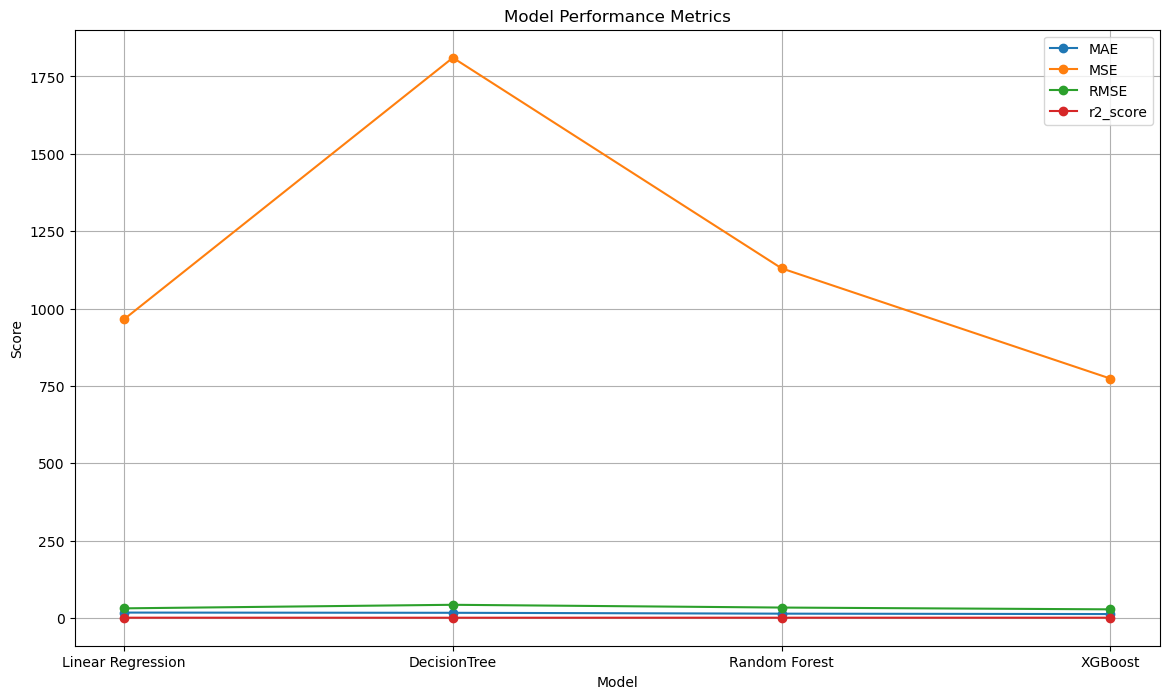

In [71]:
display_result(metrics)

In [72]:
model = ''
val = 0.0
for model_name, model_metrics in metrics.items():
    r2_score = model_metrics['r2_score']
    if isinstance(r2_score, np.float64):
        r2_score = float(r2_score)
    else:
        r2_score = float(r2_score.rstrip('%')) / 100  # Convert percentage string to float

    if r2_score > val:
        val = r2_score
        model = model_name

In [73]:
val

0.899194608293955

In [74]:
model

'XGBoost'

<div style="
    color: white; 
    background-color: gray; 
    padding: 10px; 
    text-align: center; 
    font-family: Arial, sans-serif; 
    border-radius: 15px;
    margin-top: 10px;
">
   <h2> Test the model for few properties  </h2>
</div>

In [75]:
def predict_price(loc, area, bathroom, bhk):
    loc_idx = np.where(X.columns==loc)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = area
    x[1] = bathroom
    x[2] = bhk
    if loc_idx >=0:
        x[loc_idx] = 1
    return xgb_model.predict([x])[0]

In [76]:
predict_price('location_Nanmangalam', 1000, 2, 2)

54.002888

<div style="
    color: white; 
    background-color: gray; 
    padding: 10px; 
    text-align: center; 
    font-family: Arial, sans-serif; 
    border-radius: 15px;
    margin-top: 10px;
">
   <h2> Export the tested model to a pickle file  </h2>
</div>

In [77]:
import pickle

In [78]:
with open('chennai_home_price_model.pickle','wb') as file:
    pickle.dump(xgb_model, file)

<div style="
    color: white; 
    background-color: gray; 
    padding: 10px; 
    text-align: center; 
    font-family: Arial, sans-serif; 
    border-radius: 15px;
    margin-top: 10px;
">
   <h2> Export location and column information to a file that will be useful later on in our prediction application </h2>
</div>

In [79]:
import json

In [80]:
columns = {
    'data_columns':[col.lower() for col in X.columns]
}

In [81]:
with open('chennai_columns.json','w') as file:
    file.write(json.dumps(columns))